POSTTEST 5 PRAKTIKUM KECERDASAN BUATAN

NAMA : MOHAMMAD FHADIL HAFIDS HARSANDI
NIM  : 2109106072

LINK DATASET : https://drive.google.com/file/d/18b8g24I6PkXcEluEgM1zp2n3E7R3CRE9/view?usp=drive_link

Import Library / Modul yang diperlukan

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

Membaca Dataset

In [3]:
data=pd.read_csv("Dataset-SA.csv")

=============================================================================================================================

A. Supervised Learning

Support Vector Classifier (dari SVM)

In [4]:
X = data[['product_price', 'Rate']] 
y = data['Sentiment']
y = np.where(y == 'positive', 1, -1)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train_iris, y_train_iris)
y_pred = svm.predict(X_test_iris)
y_pred_svc = svm.predict(X_test_iris)
conf_matrix_svc = confusion_matrix(y_test_iris, y_pred_svc)
class_report_svc = classification_report(y_test_iris, y_pred_svc)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

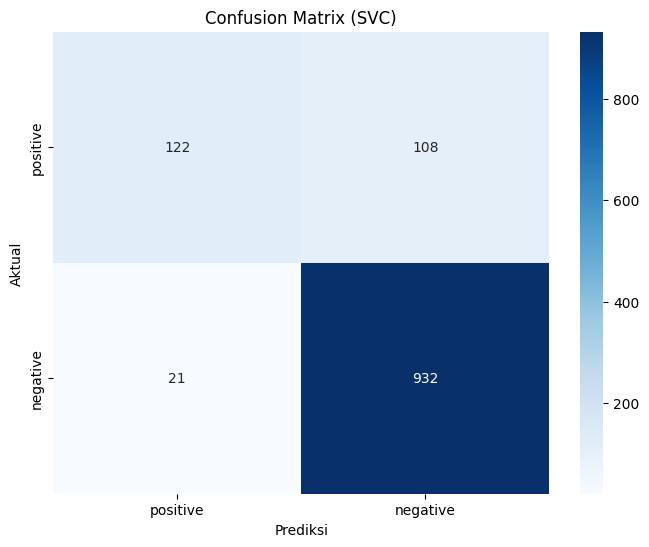

In [10]:
conf_matrix_svc = confusion_matrix(y_test_iris, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

Visualisasi Classification Report

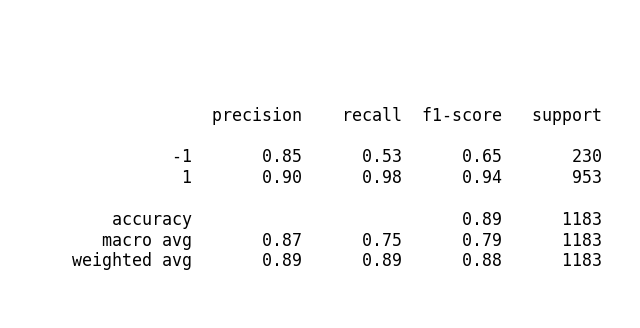

In [11]:
class_report_svc = classification_report(y_test_iris, y_pred_svc)
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

In [12]:
color_map = {'positive': 'r', 'negative': 'g'}
default_color = 'b'

y_pred_colors = [color_map.get(label, default_color) for label in y_pred_svc]
y_test_colors = [color_map.get(label, default_color) for label in y_test_iris]


HASIL PREDIKSI

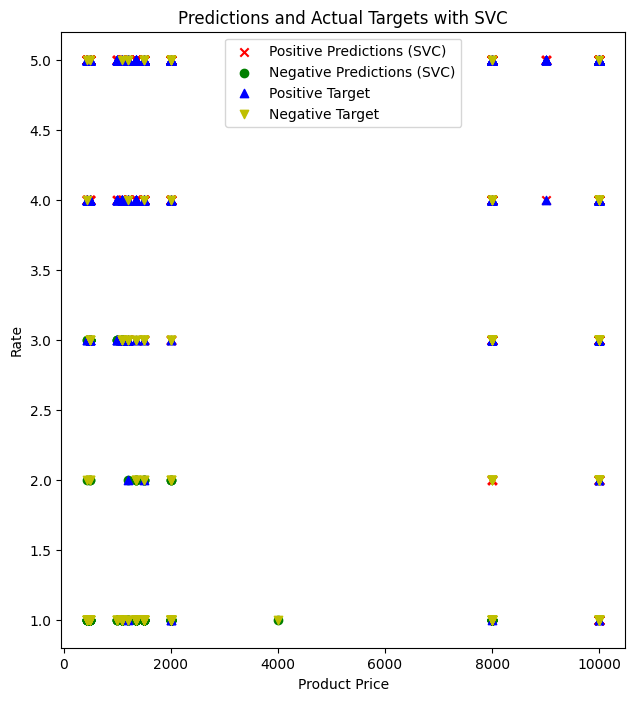

In [13]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

plt.scatter(X_test_iris[y_pred_svc == 1]['product_price'], X_test_iris[y_pred_svc == 1]['Rate'], c='r', marker='x', label='Positive Predictions (SVC)')
plt.scatter(X_test_iris[y_pred_svc == -1]['product_price'], X_test_iris[y_pred_svc == -1]['Rate'], c='g', marker='o', label='Negative Predictions (SVC)')
plt.scatter(X_test_iris[y_test_iris == 1]['product_price'], X_test_iris[y_test_iris == 1]['Rate'], c='b', marker='^', label='Positive Target')
plt.scatter(X_test_iris[y_test_iris == -1]['product_price'], X_test_iris[y_test_iris == -1]['Rate'], c='y', marker='v', label='Negative Target')

plt.xlabel('Product Price')
plt.ylabel('Rate')
plt.title('Predictions and Actual Targets with SVC')
plt.legend(loc='best')
plt.show()


=============================================================================================================================

Linear Regression

In [14]:
X = data[['product_price','Rate']]
y = data['Rate'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)  
r2 = r2_score(y_test, y_pred)

HASIL

In [18]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2-Score:", r2)

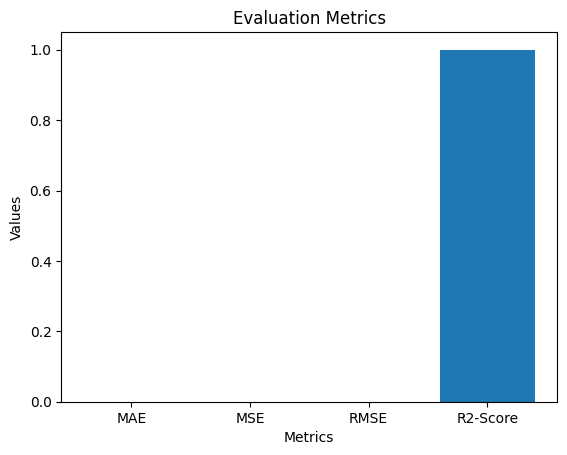

In [21]:
metrics = ["MAE", "MSE", "RMSE", "R2-Score"]
values = [mae, mse, rmse, r2]


plt.bar(metrics, values)
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Evaluation Metrics")
plt.show()

PLOT HASIL PREDIKSI

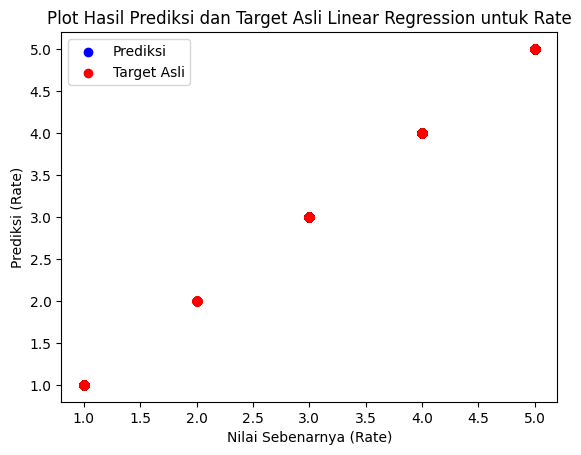

In [22]:
plt.scatter(y_test, y_pred, c='blue', label='Prediksi')
plt.scatter(y_test, y_test, c='red', label='Target Asli')
plt.xlabel("Nilai Sebenarnya (Rate)")
plt.ylabel("Prediksi (Rate)")
plt.title("Plot Hasil Prediksi dan Target Asli Linear Regression untuk Rate")
plt.legend()
plt.show()

=============================================================================================================================

#### B. Unsupervised Learning

Implementasi Metode K-Means:

In [23]:
X = data.iloc[:, [0, 4]].values 
wcss = [] 
for k in range(4, 3):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

GRAFIK ELBOW METHOD

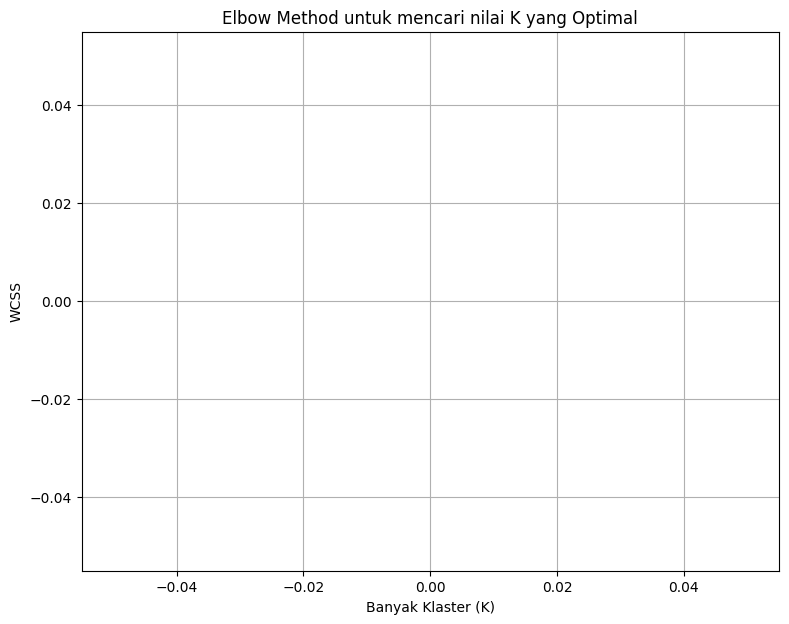

In [26]:
plt.figure(figsize=(9, 7))
plt.plot(range(6, 6), wcss, marker='o', linestyle='-', color='r')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [27]:
k = 5
kmeans = KMeans(k, n_init=10)

In [28]:
X = data[["product_price", "Rate"]]

In [29]:
kmeans.fit(X)
Rate = kmeans.predict(X)
data["Rate"] = Rate

In [30]:
ss_score = silhouette_score(X, Rate)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, Rate)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, Rate)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.86
Davies-Bouldin Index: 0.16
Calinski-Harabasz Index: 992849.43


In [31]:
true_labels = data['Sentiment']
cross_tab = pd.crosstab(Rate, true_labels)
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
Sentiment  negative  neutral  positive
row_0                                 
0                96       34       676
1               261       53      2071
2               188       40       955
3               156       34       606
4               141       52       548 



In [32]:
ari = adjusted_rand_score(true_labels, Rate)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.03


Normalized Mutual Information (NMI)

In [33]:
nmi_rate = normalized_mutual_info_score(data['Rate'], Rate)
nmi_product = normalized_mutual_info_score(data['product_price'], Rate)

print(f"Normalized Mutual Information (NMI) for Rate: {nmi_rate:.2f}")
print(f"Normalized Mutual Information (NMI) for Product Price: {nmi_product:.2f}")

Normalized Mutual Information (NMI) for Rate: 1.00
Normalized Mutual Information (NMI) for Product Price: 0.81


Fungsi HCV-M

In [34]:
homogeneity = homogeneity_score(true_labels, Rate)
completeness = completeness_score(true_labels, Rate)
v_measure = v_measure_score(true_labels, Rate)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.02
Completeness Score: 0.01
V-Measure Score: 0.01


Menampilkan hasil prediksi clustering

TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

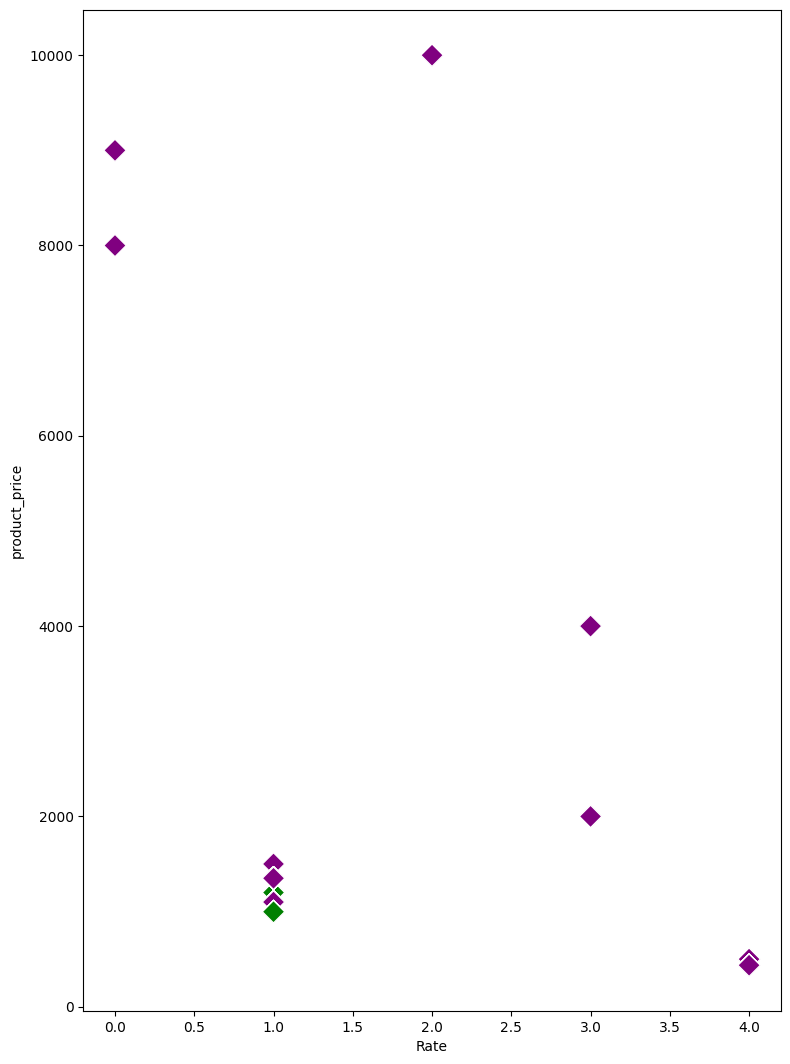

In [35]:
plt.figure(figsize=(9, 13))
colors = ["purple", "green", "blue"]

sns.scatterplot(data=data, x="Rate", y="product_price", palette=colors,
                hue="Sentiment", marker="D", s=130, label="Sentiment")

sns.scatterplot(data=df, x="Rate", y="product_price", palette=colors,
                hue="Sentiment", marker="o", s=40, label="True Labels")

cluster_centers = data.groupby("Sentiment").mean()
sns.scatterplot(data=cluster_centers, x=cluster_centers["Rate"], y=cluster_centers["product_price"],
                palette=colors, hue=cluster_centers.index, marker="*", s=200, label="Cluster Centers")

plt.title("K-Means Clustering (K=3) with True Labels and Cluster Centers")
plt.xlabel("Rate")
plt.ylabel("Product Price")
plt.legend(title="Legend", loc="upper right")
plt.show()